**Level 3**

**Task 1: Restaurant Reviews**
- Analyze the text reviews to identify the most common positive and negative keywords.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
reviews_data = df['Rating text'].value_counts()
reviews_data

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

BY seeing the above reviews_data
1. The most common positive keywords count : 301(excellent)
2. The most common negative counts:186(poor)

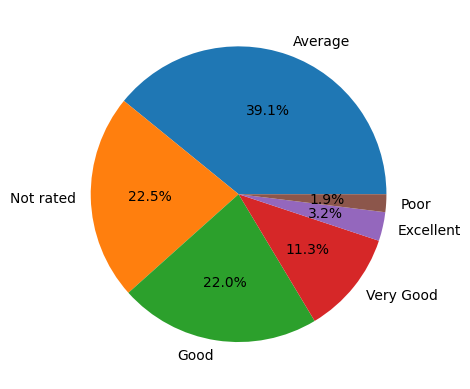

In [5]:
plt.pie(reviews_data.values, labels = reviews_data.index, autopct = "%.1f%%", radius = 1)
plt.show()

- Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [6]:
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


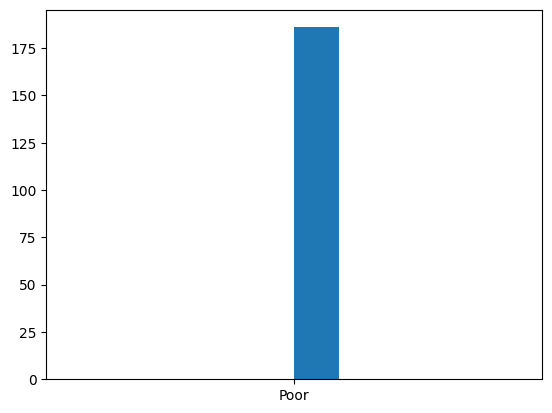

In [7]:
plt.hist(negative_data['Rating text'], label = negative_keywords)
plt.show()

**Task 2: Votes Analysis**
- Identify the restaurants with the highest and lowest number of votes.

In [8]:
restaurant_with_highest_vote = df.loc[df['Votes'] == df['Votes'].max()][['Restaurant Name','Votes']]
print(f"Restaurant with Highest votes: {restaurant_with_highest_vote.values[0][0]} {restaurant_with_highest_vote.values[0][1]}")

Restaurant with Highest votes: Toit 10934


In [9]:
restaurant_with_lowest_vote = df.loc[df['Votes'] == df['Votes'].min()][['Restaurant Name','Votes']]
print(f"Restaurant with Lowest votes: {restaurant_with_lowest_vote.values[0][0]} {restaurant_with_lowest_vote.values[0][1]}")

Restaurant with Lowest votes: Cantinho da Gula 0


- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [10]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between Votes and Ratings:", round(correlation,2))

Correlation between Votes and Ratings: 0.31


**Task 3: Price Range vs. Online Delivery and Table Booking**
- Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [11]:
price_vs_onlinedelivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize = True).unstack().fillna(0)
price_vs_tablebooking = df.groupby('Price range')['Has Table booking'].value_counts(normalize = True).unstack().fillna(0)

print("Price Range v/s Online Delivery:")
print(price_vs_onlinedelivery)
print("Price Range v/s Table Booking:")
print(price_vs_tablebooking)

Price Range v/s Online Delivery:
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444
Price Range v/s Table Booking:
Has Table booking        No       Yes
Price range                          
1                  0.999775  0.000225
2                  0.923225  0.076775
3                  0.542614  0.457386
4                  0.532423  0.467577


- Determine if higher-priced restaurants are more likely to offer these services.

In [12]:
higher_priced_restaurants = df.loc[df['Price range'] > df['Price range'].median()]
higher_price_vs_onlinedelivery = higher_priced_restaurants['Has Online delivery'].value_counts(normalize = True)
higher_price_vs_tablebooking = higher_priced_restaurants['Has Table booking'].value_counts(normalize = True)

print("\nHigher Priced Restaurants v/s Online Delivery:")
print(higher_price_vs_onlinedelivery)
print("\nHigher Priced Restaurants v/s Table Booking:")
print(higher_price_vs_tablebooking)


Higher Priced Restaurants v/s Online Delivery:
Has Online delivery
No     0.767302
Yes    0.232698
Name: proportion, dtype: float64

Higher Priced Restaurants v/s Table Booking:
Has Table booking
No     0.539619
Yes    0.460381
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Higher Priced Restaurants v/s Online Delivery')

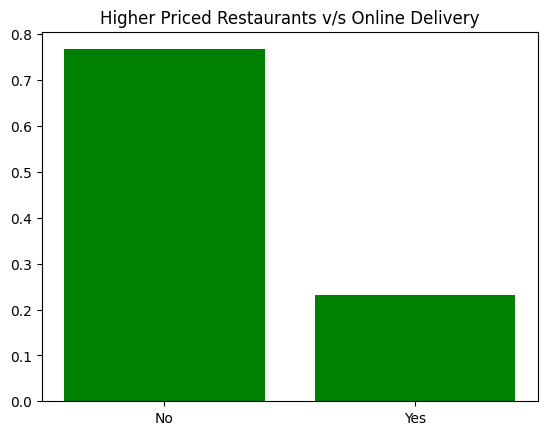

In [13]:
plt.bar(higher_price_vs_onlinedelivery.index, higher_price_vs_onlinedelivery.values, color = 'green')
plt.title('Higher Priced Restaurants v/s Online Delivery')

Text(0.5, 1.0, 'Higher Priced Restaurants v/s Table Booking')

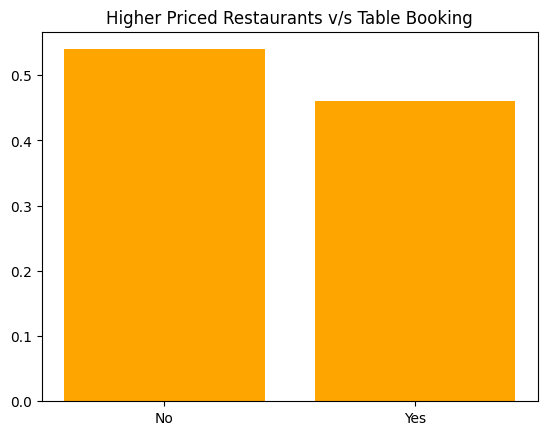

In [14]:
plt.bar(higher_price_vs_tablebooking.index, higher_price_vs_tablebooking.values, color = 'orange')
plt.title('Higher Priced Restaurants v/s Table Booking')